# Loading the Dataset

In [442]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("/Users/nafis/Downloads/Assignment1/customer_shopping_data.csv")

# Exploratory Data Analysis

### Understanding the structure of the dataset 

In [443]:
print("The length of the data (number of rows, number of columns):" + " " + str(dataset.shape))

The length of the data (number of rows, number of columns): (99461, 10)


In [444]:
print("The name of the features in the dataset:" + " " + str(dataset.columns)) 

The name of the features in the dataset: Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')


In [445]:
print("Displaying the first 10 rows of the dataset:\n")
dataset.head(10)

Displaying the first 10 rows of the dataset:



,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,8/05/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,11/09/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,5/16/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,10/24/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,5/24/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,3/13/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,1/13/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,11/04/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,8/22/2021,Kanyon


In [446]:
print("Displaying the last 10 rows of the dataset:\n")
dataset.tail(10) 

Displaying the last 10 rows of the dataset:



,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99451,I281214,C288090,Female,37,Toys,3,107.52,Cash,2/21/2021,Metropol AVM
99452,I332105,C231387,Female,65,Shoes,4,2400.68,Credit Card,8/29/2021,Metropol AVM
99453,I134399,C953724,Male,65,Clothing,1,300.08,Cash,1/01/2023,Kanyon
99454,I170504,C226974,Female,28,Books,1,15.15,Cash,2/28/2023,Zorlu Center
99455,I675411,C513603,Male,50,Toys,5,179.20,Cash,10/09/2021,Metropol AVM
99456,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,9/21/2022,Kanyon
99457,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,9/22/2021,Forum Istanbul
99458,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,3/28/2021,Metrocity
99459,I702964,C800631,Male,56,Technology,4,4200.00,Cash,3/16/2021,Istinye Park
99460,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,10/15/2022,Mall of Istanbul


In [447]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99461 entries, 0 to 99460
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99461 non-null  object 
 1   customer_id     99461 non-null  object 
 2   gender          99461 non-null  object 
 3   age             99461 non-null  int64  
 4   category        99461 non-null  object 
 5   quantity        99461 non-null  int64  
 6   price           99459 non-null  float64
 7   payment_method  99460 non-null  object 
 8   invoice_date    99461 non-null  object 
 9   shopping_mall   99461 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [448]:
dataset.describe()

,age,quantity,price
count,99461.000000,99461.000000,99459.000000
mean,43.427796,3.003398,689.253423
std,14.990849,1.413029,941.195107
min,18.000000,1.000000,0.990000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,99.000000,5.000000,5250.000000


## Finding and Fixing Missing Values 

In [449]:
print("Displaying the number of missing values:")
dataset.isnull().sum()

Displaying the number of missing values:


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             2
payment_method    1
invoice_date      0
shopping_mall     0
dtype: int64

In [450]:
# Filling the missing values in 'price' column with the mean value
dataset['price'].fillna(dataset['price'].mean(), inplace=True)

In [451]:
# Filling the missing values in 'payment_method' column with the median 
dataset['payment_method'].fillna(dataset['payment_method'].mode()[0], inplace=True)

In [452]:
print("Displaying the number of missing values after replacement:") 
dataset.isnull().sum()

Displaying the number of missing values after replacement:


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

## Converting the Datatypes

In [453]:
dataset['invoice_no'] = dataset['invoice_no'].astype(str)
dataset['customer_id'] = dataset['customer_id'].astype(str) 

In [454]:
dataset['gender'] = dataset['gender'].astype('category')
dataset['category'] = dataset['category'].astype('category')
dataset['payment_method'] = dataset['payment_method'].astype('category')
dataset['shopping_mall'] = dataset['shopping_mall'].astype('category')

In [455]:
dataset['age'] = dataset['age'].astype(int)
dataset['quantity'] = dataset['quantity'].astype(int)
dataset['price'] = dataset['price'].astype(float)

In [456]:
# Converting the 'invoice_date' values into standard pandas format
def convert_date(date):
    mode_invoice_date = dataset['invoice_date'].mode()
    try:
        return pd.to_datetime(date, format='%m/%d/%Y', errors='coerce')
    except:
        return pd.to_datetime(mode_invoice_date) + pd.to_timedelta(int(date), 'D')
dataset['invoice_date'] = dataset['invoice_date'].apply(convert_date)

In [457]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99461 entries, 0 to 99460
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99461 non-null  object        
 1   customer_id     99461 non-null  object        
 2   gender          99461 non-null  category      
 3   age             99461 non-null  int64         
 4   category        99461 non-null  category      
 5   quantity        99461 non-null  int64         
 6   price           99461 non-null  float64       
 7   payment_method  99461 non-null  category      
 8   invoice_date    99445 non-null  datetime64[ns]
 9   shopping_mall   99461 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [458]:
dataset['invoice_date']

0       2022-08-05
1       2021-12-12
2       2021-11-09
3       2021-05-16
4       2021-10-24
           ...    
99456   2022-09-21
99457   2021-09-22
99458   2021-03-28
99459   2021-03-16
99460   2022-10-15
Name: invoice_date, Length: 99461, dtype: datetime64[ns]

In [459]:
print("Number of missing values after date type conversion 'invoice_date' data:", dataset.isnull().sum())

Number of missing values after date type conversion 'invoice_date' data: invoice_no         0
customer_id        0
gender             0
age                0
category           0
quantity           0
price              0
payment_method     0
invoice_date      16
shopping_mall      0
dtype: int64


In [460]:
median_date = dataset['invoice_date'].median()
dataset['invoice_date'].fillna(median_date, inplace=True)

In [461]:
print("Number of missing values after handling the missing data: ", dataset.isnull().sum())

Number of missing values after handling the missing data:  invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [462]:
# Extracting the year, month and date from 'invoice_date' column 
dataset['year'] = dataset['invoice_date'].dt.year
dataset['month'] = dataset['invoice_date'].dt.month
dataset['date'] = dataset['invoice_date'].dt.day

In [463]:
print(dataset.dtypes)

invoice_no                object
customer_id               object
gender                  category
age                        int64
category                category
quantity                   int64
price                    float64
payment_method          category
invoice_date      datetime64[ns]
shopping_mall           category
year                       int32
month                      int32
date                       int32
dtype: object


In [464]:
print(dataset[['invoice_date', 'year', 'month', 'date']].head())

  invoice_date  year  month  date
0   2022-08-05  2022      8     5
1   2021-12-12  2021     12    12
2   2021-11-09  2021     11     9
3   2021-05-16  2021      5    16
4   2021-10-24  2021     10    24


## Handling the incorrectly spelled data 

### Gender

In [465]:
print("Unique values of gender: ", dataset['gender'].unique())

Unique values of gender:  ['Female', 'Male', 'Mal']
Categories (3, object): ['Female', 'Mal', 'Male']


In [466]:
incorrect_male_values = ["Mal"]
dataset.loc[dataset["gender"].isin(incorrect_male_values), "gender"] = "Male"

In [467]:
dataset['gender'] = dataset['gender'].cat.remove_unused_categories()
print("Unique values after replacement: " , dataset['gender'].unique())

Unique values after replacement:  ['Female', 'Male']
Categories (2, object): ['Female', 'Male']


### Category

In [468]:
print("Unique values of category: ", dataset["category"].unique())

Unique values of category:  ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', ..., 'Souvenir', 'Shoe', 'Cosmetic', 'Tech', 'Food']
Length: 15
Categories (15, object): ['Boks', 'Books', 'Clothi', 'Clothing', ..., 'Tech', 'Technology', 'Toy', 'Toys']


In [469]:
# Defining a dictionary where the keys are the correct datapoints of the column 'category' and the values are lists of incorrectly spelled datapoints
category_corrections = {
    "Clothing": ["Clothi"],
    "Shoes": ["Shoe"],
    "Books": ["Boks"],
    "Cosmetics": ["Cosmetic"],
    "Food & Beverage": ["Food"],
    "Toys": ["Toy"],
    "Technology": ["Tech"]
}

#Replacing incorrect categories with the correct ones
for correct_category, incorrect_variations in category_corrections.items():
    dataset.loc[dataset["category"].isin(incorrect_variations), "category"] = correct_category


In [470]:
print("Unique values of category after replacement: ", dataset['category'].unique())

Unique values of category after replacement:  ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']
Categories (15, object): ['Boks', 'Books', 'Clothi', 'Clothing', ..., 'Tech', 'Technology', 'Toy', 'Toys']


In [471]:
dataset['category'] = dataset['category'].cat.remove_unused_categories()
print("Unique values after replacement: " , dataset['category'].unique())

Unique values after replacement:  ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']
Categories (8, object): ['Books', 'Clothing', 'Cosmetics', 'Food & Beverage', 'Shoes', 'Souvenir', 'Technology', 'Toys']


### Payment Method

In [472]:
print("Unique values of payment method: ", dataset["payment_method"].unique())

Unique values of payment method:  ['Credit Card', 'Debit Card', 'Cash', '##error##', 'Cash Cash', 'CreditCard']
Categories (6, object): ['##error##', 'Cash', 'Cash Cash', 'Credit Card', 'CreditCard', 'Debit Card']


In [473]:
incorrect_credit_values = ["CreditCard"]
dataset.loc[dataset["payment_method"].isin(incorrect_credit_values), "payment_method"] = "Credit Card"

incorrect_cash_values = ["Cash Cash"]
dataset.loc[dataset["payment_method"].isin(incorrect_cash_values), "payment_method"] = "Cash"

In [474]:
dataset["payment_method"].replace("##error##", dataset["payment_method"].mode()[0], inplace=True)
print("Unique values of payment method after replacement: ", dataset["payment_method"].unique())

Unique values of payment method after replacement:  ['Credit Card', 'Debit Card', 'Cash']
Categories (5, object): ['Cash', 'Cash Cash', 'Credit Card', 'CreditCard', 'Debit Card']


In [475]:
dataset['payment_method'] = dataset['payment_method'].cat.remove_unused_categories()
print("Unique values after replacement: " , dataset['payment_method'].unique())

Unique values after replacement:  ['Credit Card', 'Debit Card', 'Cash']
Categories (3, object): ['Cash', 'Credit Card', 'Debit Card']


### Shopping Mall 

In [476]:
print("Unique values of shopping mall: ", dataset["shopping_mall"].unique())

Unique values of shopping mall:  ['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM', 'Istinye Park', ..., 'Emaar Square Mall', 'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center', 'Mall Istanbul']
Length: 11
Categories (11, object): ['Cevahir AVM', 'Emaar Square Mall', 'Forum Istanbul', 'Istinye Park', ..., 'Metrocity', 'Metropol AVM', 'Viaport Outlet', 'Zorlu Center']


In [477]:
incorrect_mallofistanbul_values = ["Mall Istanbul"]
dataset.loc[dataset["shopping_mall"].isin(incorrect_mallofistanbul_values), "shopping_mall"] = "Mall of Istanbul"

In [478]:
print("Unique values of shopping mall after replacement: ", dataset["shopping_mall"].unique())

Unique values of shopping mall after replacement:  ['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM', 'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall', 'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center']
Categories (11, object): ['Cevahir AVM', 'Emaar Square Mall', 'Forum Istanbul', 'Istinye Park', ..., 'Metrocity', 'Metropol AVM', 'Viaport Outlet', 'Zorlu Center']


In [479]:
dataset['shopping_mall'] = dataset['shopping_mall'].cat.remove_unused_categories()
print("Unique values after replacement: " , dataset['shopping_mall'].unique())

Unique values after replacement:  ['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM', 'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall', 'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center']
Categories (10, object): ['Cevahir AVM', 'Emaar Square Mall', 'Forum Istanbul', 'Istinye Park', ..., 'Metrocity', 'Metropol AVM', 'Viaport Outlet', 'Zorlu Center']


## Handling Duplicate Records

In [480]:
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Checking Data Distribution

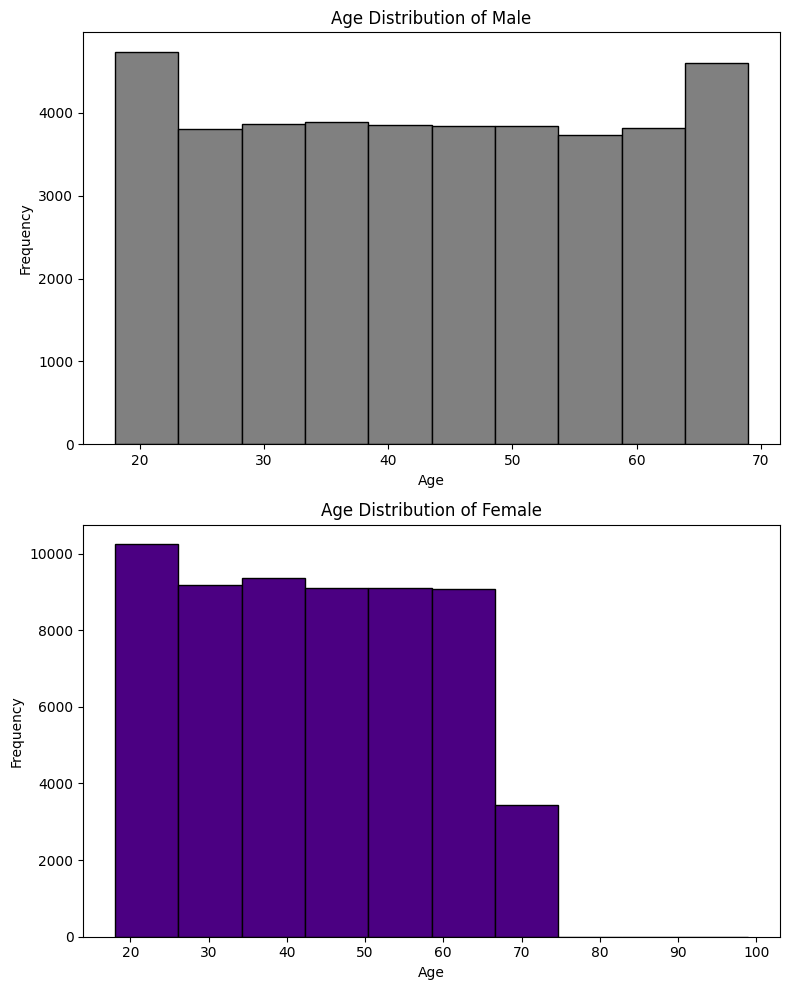

In [481]:
# Creating histograms for the age distribution by gender
plt.figure(figsize=(8, 10))

# Histogram for Male customers
plt.subplot(2, 1, 1)
plt.hist(dataset[dataset['gender'] == 'Male']['age'], bins=10, color="grey", edgecolor="black")
plt.title("Age Distribution of Male")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Histogram for Female customers
plt.subplot(2, 1, 2)
plt.hist(dataset[dataset['gender'] == 'Female']['age'], bins=10, color="indigo", edgecolor="black")
plt.title("Age Distribution of Female")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


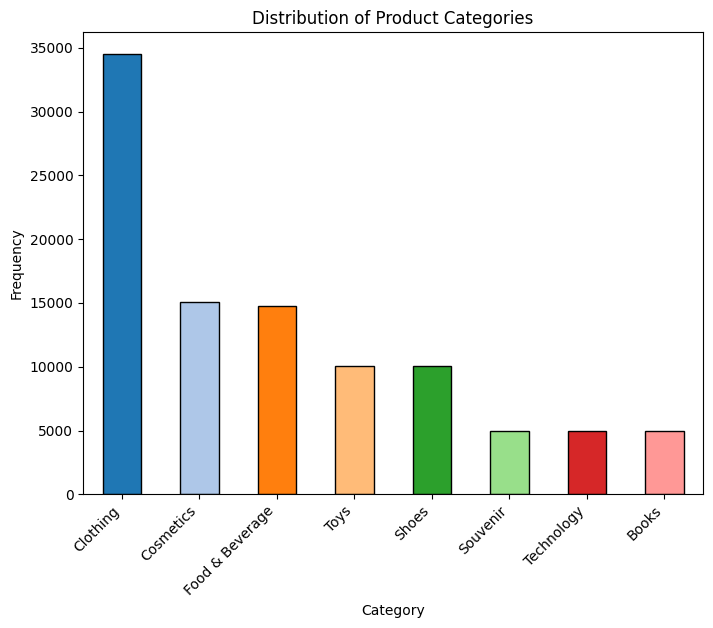

In [482]:
import matplotlib.pyplot as plt

# Counting the frequency of each category
count = dataset['category'].value_counts()

# Defining a list of colors for separate categories
colors = plt.cm.tab20(range(len(count)))

# Plot the bar plot with different colors for each category
plt.figure(figsize=(8, 6))
count.plot(kind='bar', color=colors, edgecolor="black")
plt.title("Distribution of Product Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  
plt.show()

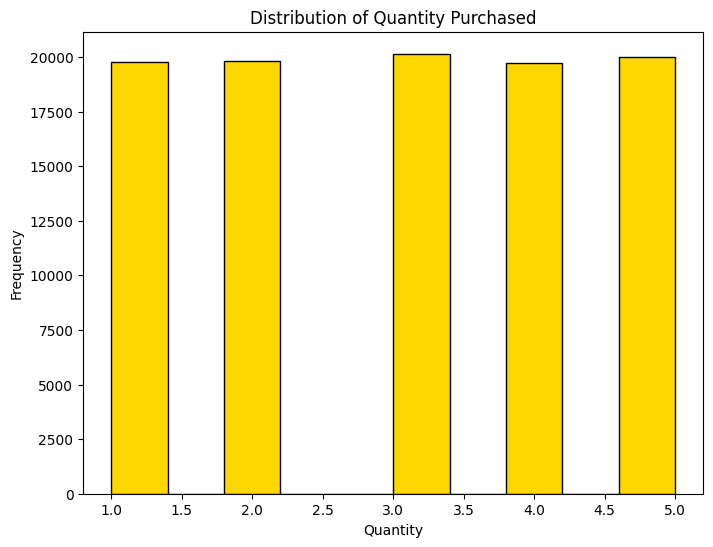

In [483]:
# Creating a histogram for the quantity column
plt.figure(figsize=(8, 6))
plt.hist(dataset['quantity'], bins=10, color="gold", edgecolor="black")
plt.title("Distribution of Quantity Purchased")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

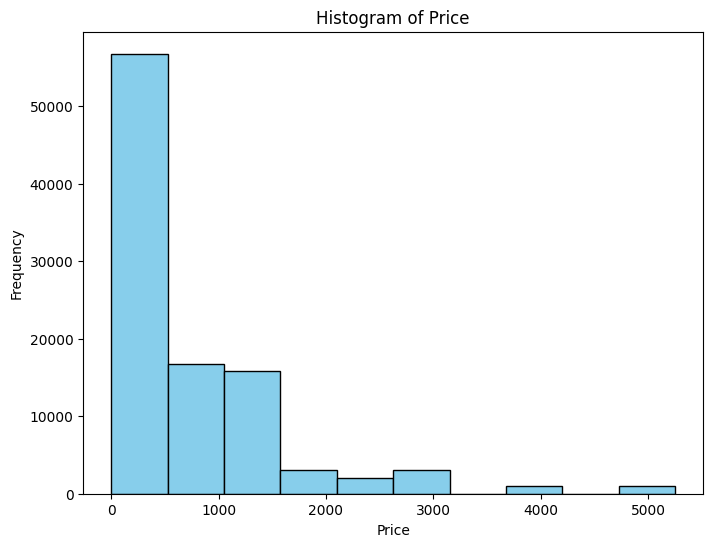

In [484]:
plt.figure(figsize=(8, 6))
plt.hist(dataset["price"], bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [485]:
print("Skewness of price: ", dataset['price'].skew())

Skewness of price:  2.247394054221134


## Fixing Skewness

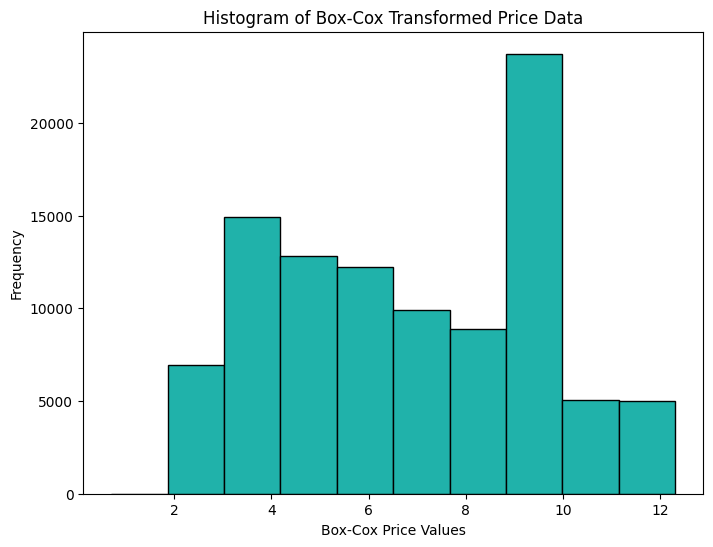

In [486]:
# Applying Box-Cox transformation to fix skewness

from scipy import stats
from scipy.stats import skew
# Adding 1 inorder to handle the zero values 
dataset["price_boxcox"], _ = stats.boxcox(dataset["price"] + 1) 

# Displaying histogram after Box-Cox transformation
plt.figure(figsize=(8, 6))
plt.hist(dataset["price_boxcox"], bins=10, color="lightseagreen", edgecolor="black")
plt.title('Histogram of Box-Cox Transformed Price Data')
plt.xlabel('Box-Cox Price Values')
plt.ylabel('Frequency')
plt.show()

In [487]:
print("Skewness of price after boxcox transformation: ", dataset["price_boxcox"].skew())

Skewness of price after boxcox transformation:  -0.05583463513130361


Text(0, 0.5, 'Frequency')

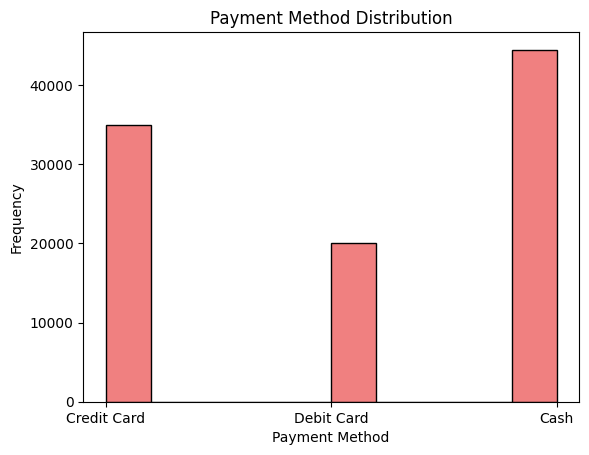

In [488]:
plt.hist(dataset["payment_method"], bins=10, color = 'lightcoral',edgecolor='black')
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Frequency")

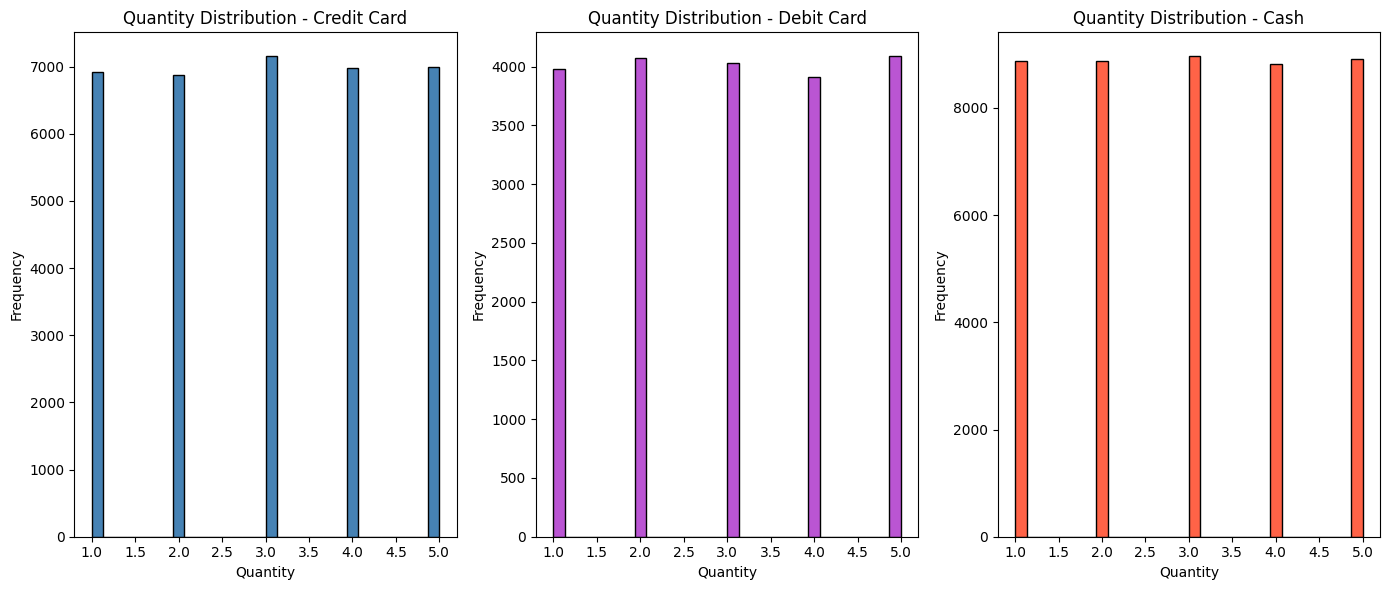

In [489]:
# Define payment methods and colors
payment_methods = ['Credit Card', 'Debit Card', 'Cash']
colors = ['steelblue', 'mediumorchid', 'tomato']

# Create histograms for each payment method
plt.figure(figsize=(14, 6))

for i, method in enumerate(payment_methods, 1):
    plt.subplot(1, 3, i)
    plt.hist(dataset[dataset['payment_method'] == method]['quantity'], bins=30, color=colors[i-1], edgecolor="black")
    plt.title(f"Quantity Distribution - {method}")
    plt.xlabel("Quantity")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


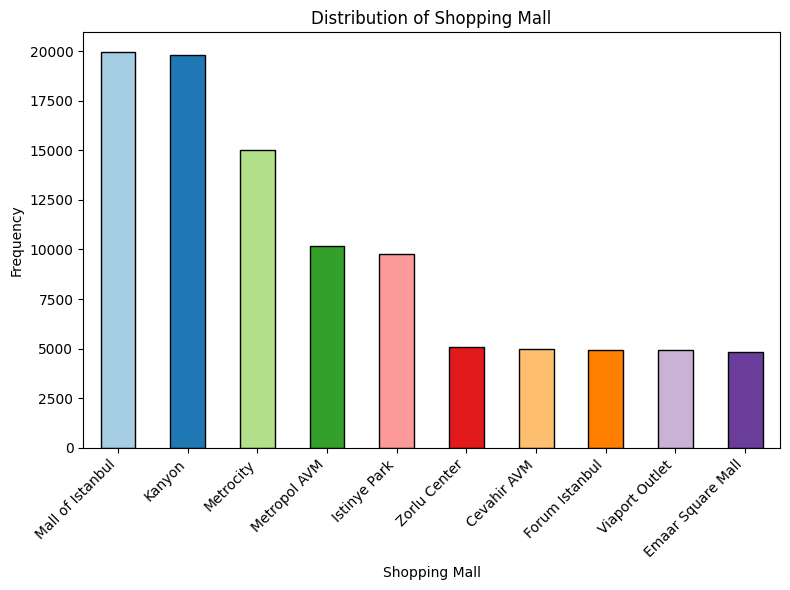

In [490]:
count = dataset['shopping_mall'].value_counts()

# Defining a list of colors for seperate shopping malls 
colors = plt.cm.Paired(range(len(count)))

# Plot the bar plot with different colors for each shopping mall
plt.figure(figsize=(8, 6))
count.plot(kind='bar', color=colors, edgecolor="black")
plt.title("Distribution of Shopping Mall")
plt.xlabel("Shopping Mall")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  
plt.tight_layout() 
plt.show()

## Handling Outliers 

In [491]:
# Calculate Q1, Q3, and IQR for the 'price' column
q1, q3 = dataset["quantity"].quantile([0.25, 0.75])
iqr = q3 - q1

# Determining the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifying outliers in the 'price' column
quantity_outliers = dataset[(dataset["quantity"] < lower_bound) | (dataset["quantity"] > upper_bound)]

print(f"Number of outliers in quantity: {quantity_outliers.shape[0]}")

Number of outliers in quantity: 0


In [492]:
# Calculating Q1, Q3, and IQR for the 'age' column
q1, q3 = dataset["age"].quantile([0.25, 0.75])
iqr = q3 - q1

# Determining the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifying outliers in the 'age' column
age_outliers = dataset[(dataset["age"] < lower_bound) | (dataset["age"] > upper_bound)]

print(f"Number of outliers in age: {age_outliers.shape[0]}")
print("Outlier values in age:\n", age_outliers["age"])


Number of outliers in age: 1
Outlier values in age:
 53606    99
Name: age, dtype: int64


In [493]:
# Calculate Q1, Q3, and IQR for the 'price' column
q1, q3 = dataset["price"].quantile([0.25, 0.75])
iqr = q3 - q1

# Determining the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifying outliers in the 'price' column
price_outliers = dataset[(dataset["price"] < lower_bound) | (dataset["price"] > upper_bound)]

print(f"Number of outliers in price: {price_outliers.shape[0]}")

Number of outliers in price: 5024


In [494]:
# Calculating the medians for 'age' and 'price'
age_median, price_median = dataset["age"].median(), dataset["price"].median()

# Replacing outliers in 'age' and 'price' columns with the respective medians
dataset.loc[age_outliers.index, "age"] = age_median
dataset.loc[price_outliers.index, "price"] = price_median

In [495]:
# Identifying outliers in 'age' after fixing
age_outliers_fixed = dataset[(dataset["age"] < lower_bound) | (dataset["age"] > upper_bound)]

print(f"Number of outliers after fixing in age: {age_outliers_fixed.shape[0]}")

Number of outliers after fixing in age: 0


In [496]:
# Identifying outliers in 'price' after fixing
price_outliers_fixed = dataset[(dataset["price"] < lower_bound) | (dataset["price"] > upper_bound)]

print(f"Number of outliers after fixing in price: {price_outliers_fixed.shape[0]}")

Number of outliers after fixing in price: 0


# Analysis

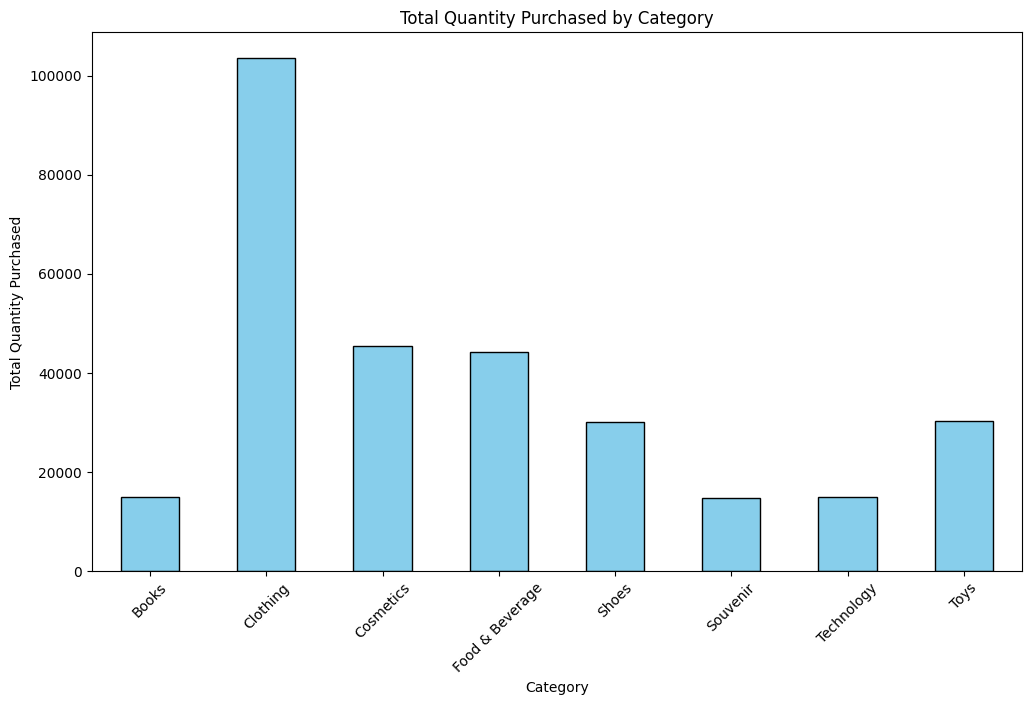

In [497]:
# Grouping by 'category' and summing the 'quantity' for each category
category_quantity = dataset.groupby('category')['quantity'].sum()

# Plotting the histogram (bar plot) for the summed quantities
plt.figure(figsize=(12, 7))
category_quantity.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Quantity Purchased by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Purchased')

plt.xticks(rotation=45)
plt.show()

Based on the bar chart of the total quantities purchased accross different categories, the shopping mall should prioritize its marketing 
campigns towards 'clothing' as it bears the most sales, showing that customers like buying clothes. Since it has the biggest potential 
to increase sales and attract customers. Ultimately enhance customer engagement and optimize marketing spend. And as a secondary strategy, 
they can increase their sales in the least ones such as books, souvenir and technology. 

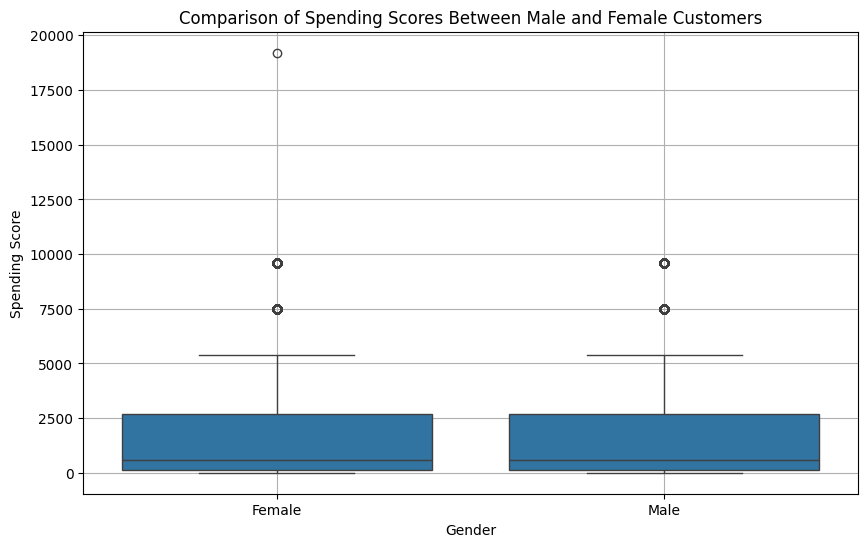

In [498]:
# Calculate total spending per transaction
dataset['spending_score'] = dataset['quantity'] * dataset['price']

# Aggregate spending scores by customer_id
customer_spending = dataset.groupby('customer_id')['spending_score'].sum().reset_index()

# Merge spending scores with gender information
customer_gender = dataset[['customer_id', 'gender']].drop_duplicates()
spending_gender = pd.merge(customer_spending, customer_gender, on='customer_id')

# Create a box plot to compare spending scores by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='spending_score', data=spending_gender)
plt.title('Comparison of Spending Scores Between Male and Female Customers')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()



From the boxplot above we can derive that both males and females have the same median spending score, meaning their average spending is
similar. The spread of spending scores is also about the same for both genders as the box lengths are comparable. However, there are 
three high spending outliers among females, with one being very high. This shows that some female customers spend much more than most. In 
comparision, there are only two high-spending outliers among males, suggesting fewer extreme spenders. 

Verification for segmentations:
   age age_group
0   28     26-35
1   21     18-25
2   20     18-25
3   66       56+
4   53     46-55
5   28     26-35
6   49     46-55
7   32     26-35
The spending score by varying age groups:
  age_group  spending_score
0     18-25    2.655796e+07
1     26-35    3.304798e+07
2     36-45    3.365323e+07
3     46-55    3.360131e+07
4       56+    4.631654e+07


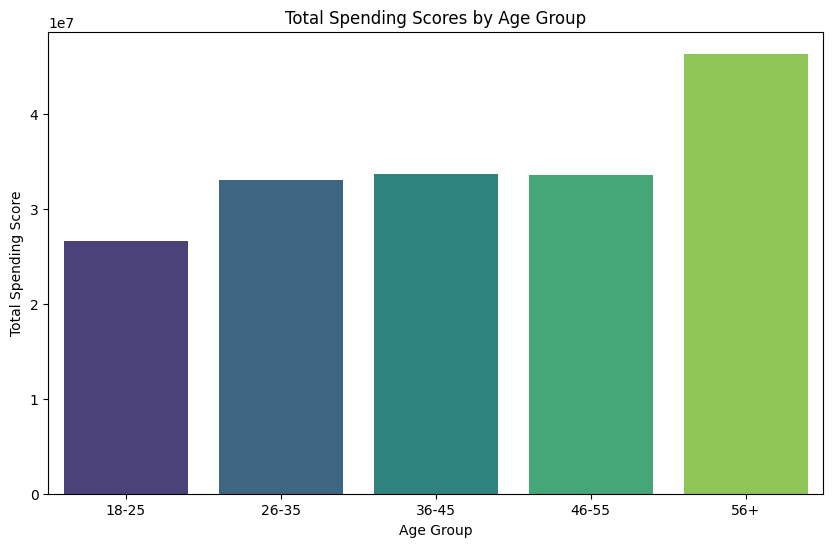

In [499]:
# Defining age bins and labels
bins = [17, 25, 35, 45, 55, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']

# Creating a new column 'age_group'
dataset['age_group'] = pd.cut(dataset['age'], bins=bins, labels=labels, right=True)

print("Verification for segmentations:")
print(dataset[['age', 'age_group']].head(8))

# Calculating spending score for each transaction
dataset['spending_score'] = dataset['quantity'] * dataset['price']

# Aggregating spending scores by age group
age_group_spending = dataset.groupby('age_group')['spending_score'].sum().reset_index()

print("The spending score by varying age groups:\n" + str(age_group_spending))

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='spending_score', data=age_group_spending, palette='viridis')
plt.title('Total Spending Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending Score')
plt.show()

After segmenting the customers into different age groups and calculating the total spending scores for each group we can observe the following:
Age Group Spending Scores: 
The total spending score for each group is calculated, and the results are;- 
1.18-25: 26,557,960 TL
2.26-35: 33,047,980 TL
3.36-45: 33,653,230 TL
4.46-55: 33,601,310 TL
5.56+: 46,316,540 TL
The bar chart shows the total spending scores for each group. According to the chart, the 56+ age group has the highest total spending score, indicating that customers in this age group spend the most in total compared to other age groups. The spending scores for other age groups are relatively close to each other with slight variations between them. This suggests that while older customers contribute more to total spending, spending is fairly distributed accross younger age groups as well. 

# Recommendations

Total Sales by Payment Method:
  payment_method  spending_score
0           Cash    7.769353e+07
1    Credit Card    6.041570e+07
2     Debit Card    3.506780e+07


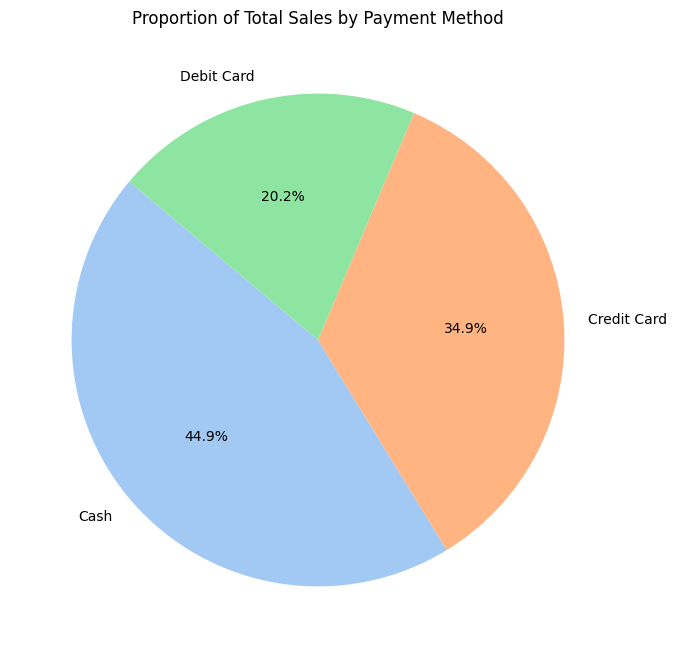

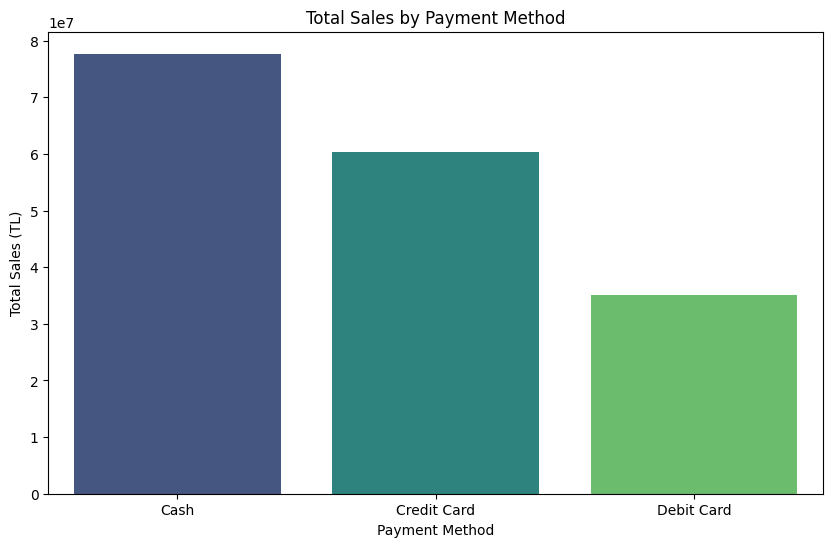

In [500]:
# Calculating the spending score for each transaction
dataset['spending_score'] = dataset['quantity'] * dataset['price']

# Aggregating total sales by payment method
total_sales_by_payment_method = dataset.groupby('payment_method')['spending_score'].sum().reset_index()

# Sorting data for better visualization
total_sales_by_payment_method = total_sales_by_payment_method.sort_values('spending_score', ascending=False)

print("Total Sales by Payment Method:\n" + str(total_sales_by_payment_method))

# Plotting the proportion of total sales by payment method using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_sales_by_payment_method['spending_score'], 
        labels=total_sales_by_payment_method['payment_method'], 
        autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'), 
        startangle=140)
plt.title('Proportion of Total Sales by Payment Method')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='payment_method', y='spending_score', data=total_sales_by_payment_method, palette='viridis')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales (TL)')
plt.show()

To visualize the proportion of total sales made by each payment method, a pie chart and a bar chart was created which tells us that:
Total sales by payment method: 
Cash: 77693530 TL(49.9%) 
Debit Card: 60415700 TL(34.9%)
Credit Card: 35067800 TL(20.2%)
The visualizations indicate customers prefer using cash for transactions the most, as it has the highest proportion of total sales, followed
by credit cards with debit cards being the least preferred payment method. 

Total Sales (TL) for each month:
invoice_date
2021-01-31     9640564.62
2021-02-28     8772315.22
2021-03-31     9455359.38
2021-04-30     9389541.54
2021-05-31     9771626.22
2021-06-30     9285892.60
2021-07-31    10306318.40
2021-08-31     9630655.70
2021-09-30     9188165.62
2021-10-31    10263015.06
2021-11-30     9260017.41
2021-12-31     9584877.60
2022-01-31     9763898.13
2022-02-28     8343095.42
2022-03-31     9986685.16
2022-04-30     9326144.44
2022-05-31     9946923.57
2022-06-30     9647503.95
2022-07-31    10066957.83
2022-08-31     9651705.59
2022-09-30     9607629.29
2022-10-31    10282075.37
2022-11-30     8940384.34
2022-12-31     9869885.48
2023-01-31     9485599.83
2023-02-28     9508662.96
2023-03-31     2514146.79
Name: spending_score, dtype: float64


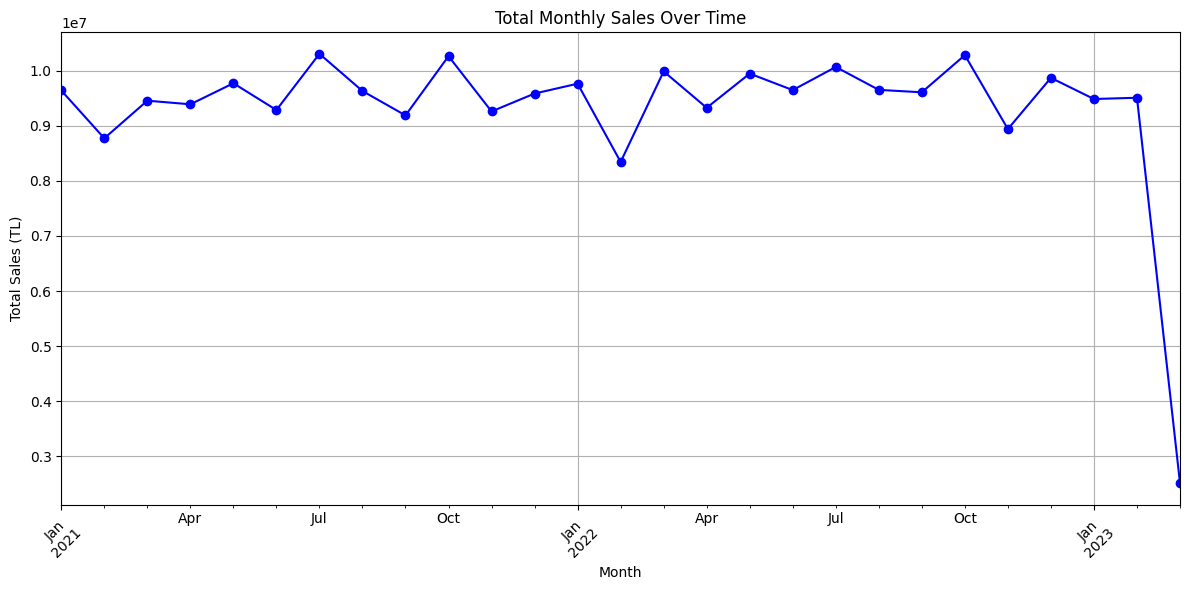

In [501]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("/Users/nafis/Downloads/Assignment1/customer_shopping_data.csv")

# Checking if the 'invoice_date' is an integer (possible Excel date format)
if pd.api.types.is_integer_dtype(dataset['invoice_date']):
    # Converting Excel serial date numbers to datetime
    dataset['invoice_date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(dataset['invoice_date'], unit='D')
else:
    # Converting 'invoice_date' to datetime format
    try:
        dataset['invoice_date'] = pd.to_datetime(dataset['invoice_date'], format='%m/%d/%Y', errors='coerce')
    except ValueError:
        # If the above format doesn't work, use 'mixed' for flexible parsing
        dataset['invoice_date'] = pd.to_datetime(dataset['invoice_date'], format='mixed', dayfirst=True, errors='coerce')

# Extracting the year, month, and date from 'invoice_date' column
dataset['year'] = dataset['invoice_date'].dt.year
dataset['month'] = dataset['invoice_date'].dt.month
dataset['date'] = dataset['invoice_date'].dt.day

# Calculating the spending score for each transaction
dataset['spending_score'] = dataset['quantity'] * dataset['price']

# Setting 'invoice_date' as the index
dataset.set_index('invoice_date', inplace=True)

# Resampling the data by month and summing the spending scores
monthly_sales = dataset['spending_score'].resample('M').sum()

# Printing the y-labels (total sales for each month)
print("Total Sales (TL) for each month:")
print(monthly_sales)

# Plotting the total monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Total Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (TL)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


According to line chart, it visualizes the total monthly sales from January 2021 to March 2023. The y-axis represents the total sales 
in Turkish Lira(TL), while the x-axis represents the months over this period. 
Observed Trends and Patterns:
1. Steady Sales Performance(2021-2022): From January 2021 to December 2022, the monthly sales are relatively stable, meaning 
consistent sales performance over this period. 
2. Flunctuations: There might be minor peaks around July 2021 and July 2022 and the end of the year meaning December 2021 and
December 2022, suggesting higher spending during these periods. As there were minor peaks in July, marketing campaigns can be arranged to 
increase more sales and attract more customers. 
3. Significant Drop (March 2023): A noticeable drop in total monthly sales occur in March 2023 falling sharply from the previous month
(February 2023) which requires further investigation for such drop. Understanding the cause could help in making informed decisions to 
prevent such declines in future. 